In [1]:
# IMPORT LIBRARIES

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

# Data Exploration

In [2]:
# IMPORT DATA
data = pd.read_csv("../input/videogamesales/vgsales.csv")
data.head() # Here is some information about the dataset.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.info() # Detailed info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data_frame = data[['Genre']] # Creating DataFrame
data_frame

,Genre
0,Sports
1,Platform
2,Racing
3,Sports
4,Role-Playing
...,...
16593,Platform
16594,Shooter
16595,Racing
16596,Puzzle


In [5]:
series = data['Genre'] # Creating Series
series

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16593        Platform
16594         Shooter
16595          Racing
16596          Puzzle
16597        Platform
Name: Genre, Length: 16598, dtype: object

# Data Filtering

**To filter data we can use these operators: |,&,<,>,=**

In [6]:
data1 = data["Rank"]<11
data1 # Return 'Rank' values that less than 11 as True or False

0         True
1         True
2         True
3         True
4         True
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Name: Rank, Length: 16598, dtype: bool

In [7]:
data2 = data[data["Rank"]<11]
data2 # Return 'Rank' values that less than 11 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [8]:
data[(data["Rank"]<11) & (data["Year"] > 2000)] # And Operator
## data[(data["Rank"]<11) | (data["Year"] > 2000)] # Also we can use Or Operator

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


# Data Cleaning

**To analyze it better we will do some things**
* The Dataset has 16.598 Rows and 11 Columns.
* We will clean the NaN (Not a Number) values in dataset.
* We will remove values which published later than 2015.

In [9]:
data.dropna(axis = 0,how = 'any',inplace=True) # Clear NaN values.
data.drop(data[data["Year"]>2015].index,inplace=True) # Filter values and drop them.

* axis 0 --> Index 
* axis 1 --> Columns
* inplace --> Modifies the data

In [10]:
data.sort_values(by="Year",ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4510,4512,Rock Band 4,XOne,2015.0,Misc,Harmonix Music Systems,0.35,0.04,0.00,0.04,0.43
15979,15982,Xblaze: Lost Memories,PS3,2015.0,Adventure,Arc System Works,0.01,0.00,0.00,0.00,0.02
7607,7609,Saints Row IV,XOne,2015.0,Action,Deep Silver,0.10,0.09,0.00,0.02,0.20
4884,4886,Skylanders: SuperChargers,PS3,2015.0,Action,Activision,0.15,0.18,0.00,0.06,0.39
9918,9920,MegaTagmension Blanc + Neptune VS Zombies,PSV,2015.0,Action,Idea Factory International,0.02,0.03,0.05,0.01,0.12
...,...,...,...,...,...,...,...,...,...,...,...
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.00,0.00,0.24
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05


# Data Visualization

**MATPLOTLIB**
Matplot is a python library that help us to plot data. We will use 3 kind of plots.
* Line Plot : We use it when x axis is time
* Scatter Plot : We use it when there is correlation between two variables
* Histogram Plot : We use it when we want to see distribution of numerical data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15945 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          15945 non-null  int64  
 1   Name          15945 non-null  object 
 2   Platform      15945 non-null  object 
 3   Year          15945 non-null  float64
 4   Genre         15945 non-null  object 
 5   Publisher     15945 non-null  object 
 6   NA_Sales      15945 non-null  float64
 7   EU_Sales      15945 non-null  float64
 8   JP_Sales      15945 non-null  float64
 9   Other_Sales   15945 non-null  float64
 10  Global_Sales  15945 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


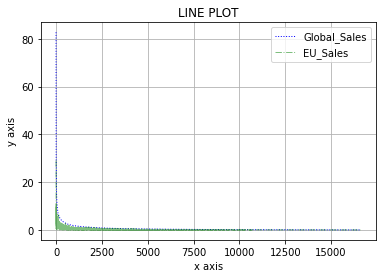

In [12]:
# LINE PLOT
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Global_Sales.plot(kind = 'line',color = 'b',label = 'Global_Sales',linewidth = 1,alpha = 1,grid = True,linestyle = ':')
data.EU_Sales.plot(kind = 'line',color = 'g',label = 'EU_Sales',linewidth = 1,alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # info about lines
plt.xlabel('x axis')
plt.ylabel('y axis')              # axis
plt.title('LINE PLOT')            # title = title of plot
plt.show()

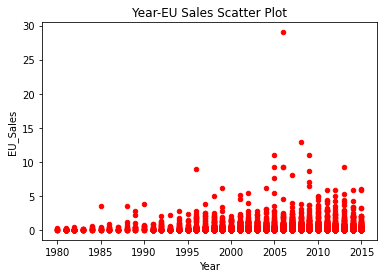

In [13]:
# SCATTER PLOT
# X axis is Year Y axis is EU_Sales
data.plot(kind='scatter',x='Year',y='EU_Sales',color='red',alpha=1)
plt.xlabel('Year')              # label = name of label
plt.ylabel('EU_Sales')
plt.title('Year-EU Sales Scatter Plot')  # title = title of plot
plt.show()

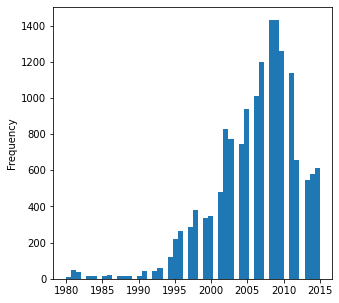

In [14]:
# HISTOGRAM PLOT
# bins = number of bar in figure
data.Year.plot(kind = 'hist',bins = 50,figsize = (5,5))
plt.show()